# Installation
To start your homework, you need to install requirements. We recommend that you use conda environment for this homework.

Assuming that you have a just-installed Ubuntu 22.04 machine, below are the commands you need to run:

1. apt-get update
2. apt-get install -y curl gcc
3. curl -O https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
4. bash Miniconda3-latest-Linux-x86_64.sh
5. source ~/.bashrc
6. conda create -n lfdhw1 python=3.10.13 numpy=2.2.4 matplotlib=3.10.0 contourpy=1.3.1 scipy=1.15.1 scikit-learn=1.6.1
7. conda activate lfdhw1
8. conda install -c conda-forge notebook pandas
9. cd error_utils && pip install -e .

In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A. Optimization
In this section of the homework, you will implement the following optimization methods:

0. Zero-order optimization methods:
    - Random Search
    - Coordinate Search
1. First-order optimization methods:
    - Gradient Descent
    - Coordinate Descent
2. Second-order optimization methods:
    - Newton's Method

In [80]:
import numpy as np
from functools import partial

from optim import random_search, coordinate_search
from optim import GradientDescent, CoordinateDescent, NewtonsMethod
from error_utils import rel_error, eval_numerical_gradient, eval_numerical_hessian

Let's start with a generic quadratic function, $g(\mathbf{w}) = \frac{1}{2} \mathbf{w}^T \mathbf{A} \mathbf{w} + \mathbf{b}^T \mathbf{w} + c$.

In [81]:
def g(w, A, b, c):
    return 0.5 * w.T @ (A + A.T) / 2 @ w + b.T @ w + c

In [82]:
A = np.array([[1, 2], [-2, 3]])
b = np.array([7, 8])
c = 3

## A.0 Zero-order optimization methods [5+5 pts]
Implement the `random_search` and `coordinate_search` functions in the `optim.py` file. Find the minimum of the function and the minimum value using these functions. Define appropriate bounds and number of iterations in the notebook.

In [83]:
#########################################################
#
# FILL IN THE CODE BELOW
#
#########################################################
# Set the bounds and the number of iterations here.

bounds = np.array([
    [-10, 10],
    [-10, 10]
])

n_iterations = 1000

In [84]:
best_random, best_random_eval, history_rand = random_search(partial(g, A=A, b=b, c=c), bounds, n_iterations)

if abs(best_random_eval - -32.166666666666664) > 1e-1:
    print("Error: The minimum value has not been correctly estimated")
else:
    print("The minimum value is approximately correct")
    print(f"The minimum value by using random search is {best_random_eval} at {best_random}")

The minimum value is approximately correct
The minimum value by using random search is -32.128278389107656 at [-7.26742073 -2.62478306]


In [85]:
best_coor, best_coor_eval, history_coor = coordinate_search(partial(g, A=A, b=b, c=c), bounds, n_iterations)

if abs(best_coor_eval - -32.166666666666664) > 1e-1:
    print("Error: The minimum value has not been correctly estimated")
else:
    print("The minimum value is approximately correct")
    print(f"The minimum value by using coordinate search is {best_coor_eval} at {best_coor}")

The minimum value is approximately correct
The minimum value by using coordinate search is -32.13002975399217 at [-6.73762079 -2.70509831]


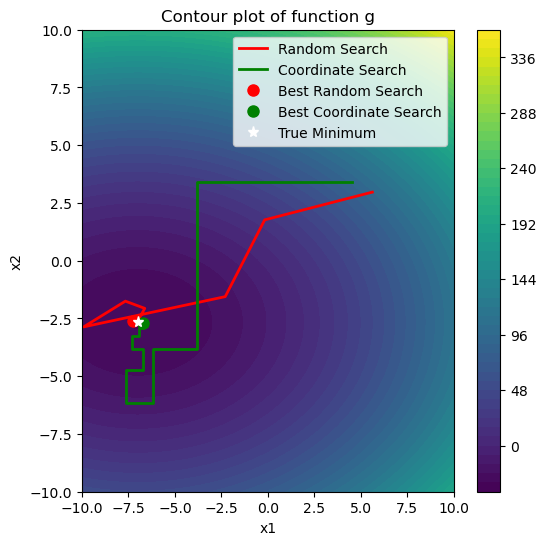

In [86]:
import matplotlib.pyplot as plt

# Define the grid for contour plot
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = np.array([g(np.array([x, y]), A, b, c) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# Plot the contour
plt.figure(figsize=(6, 6))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Contour plot of function g')
plt.xlabel('x1')
plt.ylabel('x2')

# Plot the history of random search
history_rand = np.array(history_rand)
plt.plot(history_rand[:, 0], history_rand[:, 1], 'r-', linewidth=2, label='Random Search')

# Plot the history of coordinate search
history_coor = np.array(history_coor)
plt.plot(history_coor[:, 0], history_coor[:, 1], 'g-', linewidth=2, label='Coordinate Search')

# Mark the best points found
plt.plot(best_random[0], best_random[1], 'ro', markersize=8, label='Best Random Search')
plt.plot(best_coor[0], best_coor[1], 'go', markersize=8, label='Best Coordinate Search')
plt.plot(-7, -2.66666667, 'w*', markersize=8, label='True Minimum')

plt.legend()
plt.show()


# A.1 First-order optimization methods [5+5 pts]
Implement the `__call__` method of the `GradientDescent` and `CoordinateDescent` classes in the `optim.py` file. Find the minimum of the function and the minimum value using these functions. Define learning rate, initial point, and number of iterations in the notebook. You also need to fill in the gradient function under the definition `dg`. If `lr` is set to "diminishing", it should monotonically decrease in each iteration.

In [87]:
#########################################################
#
# FILL IN THE CODE BELOW
#
#########################################################
# Set the learning rate, the number of iterations and the initial point here.

lr = "diminishing"
n_iter = 1000
w0 = np.zeros(2)

In [88]:
#########################################################
#
# FILL IN THE CODE BELOW
#
#########################################################
# Calculate the gradient of the function, g
# Ensure that you also write the gradient for the case when idx is not None. This should give the derivative of the function with respect to the index.

def dg(w, A, b, c, idx=None):
    M = (A + A.T) / 2
    if idx is not None:
        if idx < 0:
            raise ValueError("Negative index")
        if idx == 0:
            return g(w, A, b, c)
        elif idx == 1:
            return M @ w + b
        elif idx == 2:
            return M
        else:
            n = w.shape[0]
            return np.zeros((n, n, n))
    return M @ w + b

In [89]:
grad_analytical = dg(w0, A, b, c)
grad_numerical = eval_numerical_gradient(partial(g, A=A, b=b, c=c), w0)

if rel_error(grad_analytical, grad_numerical) > 1e-6:
    print("Error: The gradient has not been correctly estimated")
else:
    print("The gradient is correct")


The gradient is correct


In [90]:
import time


# Calculate runtime of dg when idx is None
runtimes_none = []
for _ in range(100000):
    start_time = time.time()
    dg(w0, A, b, c, idx=None)
    runtimes_none.append(time.time() - start_time)
avg_runtime_none = sum(runtimes_none) / len(runtimes_none)
print(f"Average runtime of dg with idx=None over 100000 runs: {avg_runtime_none} seconds")

# Calculate runtime of dg when idx is 0
runtimes_zero = []
for _ in range(100000):
    start_time = time.time()
    dg(w0, A, b, c, idx=0)
    runtimes_zero.append(time.time() - start_time)
avg_runtime_zero = sum(runtimes_zero) / len(runtimes_zero)
print(f"Average runtime of dg with idx=0 over 100000 runs: {avg_runtime_zero} seconds")


Average runtime of dg with idx=None over 100000 runs: 3.2092595100402834e-06 seconds
Average runtime of dg with idx=0 over 100000 runs: 7.004399299621582e-06 seconds


In [91]:
optimizer = GradientDescent(partial(g, A=A, b=b, c=c), partial(dg, A=A, b=b, c=c), lr=lr, n_iter=n_iter)

In [92]:
best_gd, best_gd_eval, history_gd = optimizer(w0)
if abs(best_gd_eval - -32.166666666666664) > 1e-6:
    print("Error: The minimum value has not been correctly estimated")
    print(f"The minimum value by using gradient descent is {best_gd_eval} at {best_gd}")
else:
    print("The minimum value is approximately correct")
    print(f"The minimum value by using gradient descent is {best_gd_eval} at {best_gd}")
    print(f"Converged in {len(history_gd)-1} iterations")

The minimum value is approximately correct
The minimum value by using gradient descent is -32.166666666666664 at [-7.         -2.66666667]
Converged in 3 iterations


In [93]:
optimizer = CoordinateDescent(partial(g, A=A, b=b, c=c), partial(dg, A=A, b=b, c=c), lr=lr, n_iter=n_iter)

In [94]:
best_cd, best_cd_eval, history_cd = optimizer(w0)
if abs(best_cd_eval - -32.166666666666664) > 1e-6:
    print("Error: The minimum value has not been correctly estimated")
    print(f"The minimum value by using coordinate descent is {best_cd_eval} at {best_cd}")
else:
    print("The minimum value is approximately correct")
    print(f"The minimum value by using coordinate descent is {best_cd_eval} at {best_cd}")
    print(f"Converged in {len(history_cd)-1} iterations")

The minimum value is approximately correct
The minimum value by using coordinate descent is -32.16666665986585 at [-7.       -2.666734]
Converged in 1000 iterations


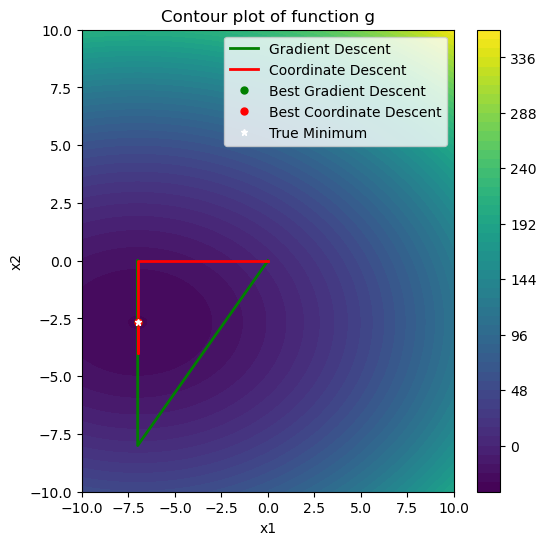

In [95]:
import matplotlib.pyplot as plt


# Define the grid for contour plot
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = np.array([g(np.array([x, y]), A, b, c) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# Plot the contour
plt.figure(figsize=(6, 6))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Contour plot of function g')
plt.xlabel('x1')
plt.ylabel('x2')

# Plot the history of gradient descent
history_gd = np.array(history_gd)
plt.plot(history_gd[:, 0], history_gd[:, 1], 'g-', linewidth=2, label='Gradient Descent')

# Plot the history of coordinate descent
history_cd = np.array(history_cd)
plt.plot(history_cd[:, 0], history_cd[:, 1], 'r-', linewidth=2, label='Coordinate Descent')

# Mark the best points found
plt.plot(best_gd[0], best_gd[1], 'go', markersize=5, label='Best Gradient Descent')
plt.plot(best_cd[0], best_cd[1], 'ro', markersize=5, label='Best Coordinate Descent')
plt.plot(-7, -2.66666667, 'w*', markersize=5, label='True Minimum')

plt.legend()
plt.show()


# A.2 Second-order optimization methods [5 pts]
Implement the `__call__` method of the `NewtonsMethod` class in the `optim.py` file. Find the minimum point of the function and the minimum value using adequate functions. Define the initial point and number of iterations in the notebook. While using your previous `dg` function, you need to fill in the Hessian function under the definition `d2g`.

In [96]:
#########################################################
#
# FILL IN THE CODE BELOW
#
#########################################################
# Calculate the Hessian of the function, g

def d2g(w, A, b, c):
    return (A + A.T) / 2

In [97]:
grad_analytical = d2g(w0, A, b, c)
grad_numerical = eval_numerical_hessian(partial(g, A=A, b=b, c=c), w0)

if rel_error(grad_analytical, grad_numerical) > 1e-6:
    print("Error: The gradient has not been correctly estimated")
else:
    print("The Hessian is correct")

The Hessian is correct


In [98]:
optimizer = NewtonsMethod(partial(g, A=A, b=b, c=c), partial(dg, A=A, b=b, c=c), partial(d2g, A=A, b=b, c=c), n_iter=n_iter)
best_newton, best_newton_eval, history_newton = optimizer(w0)

In [99]:
if abs(best_newton_eval - -32.166666666666664) > 1e-6:
    print("Error: The minimum value has not been correctly estimated")
    print(f"The minimum value by using coordinate descent is {best_newton_eval} at {best_newton}")
else:
    print("The minimum value is approximately correct")
    print(f"The minimum value by using coordinate descent is {best_newton_eval} at {best_newton}")
    print(f"Converged in {len(history_newton)-1} iterations")

The minimum value is approximately correct
The minimum value by using coordinate descent is -32.166666666666664 at [-7.         -2.66666667]
Converged in 1 iterations


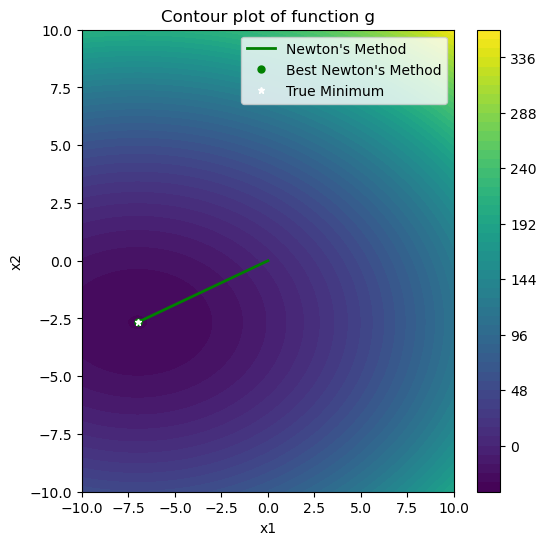

In [100]:
import matplotlib.pyplot as plt


# Define the grid for contour plot
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = np.array([g(np.array([x, y]), A, b, c) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# Plot the contour
plt.figure(figsize=(6, 6))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Contour plot of function g')
plt.xlabel('x1')
plt.ylabel('x2')

# Plot the history of coordinate descent
history_newton = np.array(history_newton)
plt.plot(history_newton[:, 0], history_newton[:, 1], 'g-', linewidth=2, label='Newton\'s Method')

# Mark the best points found
plt.plot(best_newton[0], best_newton[1], 'go', markersize=5, label='Best Newton\'s Method')
plt.plot(-7, -2.66666667, 'w*', markersize=5, label='True Minimum')

plt.legend()
plt.show()

# B. Linear Regression
In this section of the homework, your task is to use the least squares theorem (for some of the methods) to find a linear function that can best fit a data. The least squares theorem is a method for solving the problem of minimizing the squared errors between two values $\underset{\mathbf{x}}{\min} \|\mathbf{A}\mathbf{x} - \mathbf{b}\|^2$. You will implement the following linear regression methods:
1. Least Squares
2. Ridge Regression
3. Lasso Regression
4. Elastic Net Regression


## B.1 Data Generation

You are provided data that is being generated from a function $f(x) = 0.1x^2 + 4x + 2$. However, $x$ and $f(x)$ are both subject to noise coming from $\epsilon_x \sim N(0, 0.01)$ and $\epsilon_{f(x)} \sim N(0, 0.1)$, respectively. You don't need to modify anything in this section. However, `MinMaxScaler` and `TrainTestSplit` classes are not implemented in the `utils.py` file. You need to implement them.

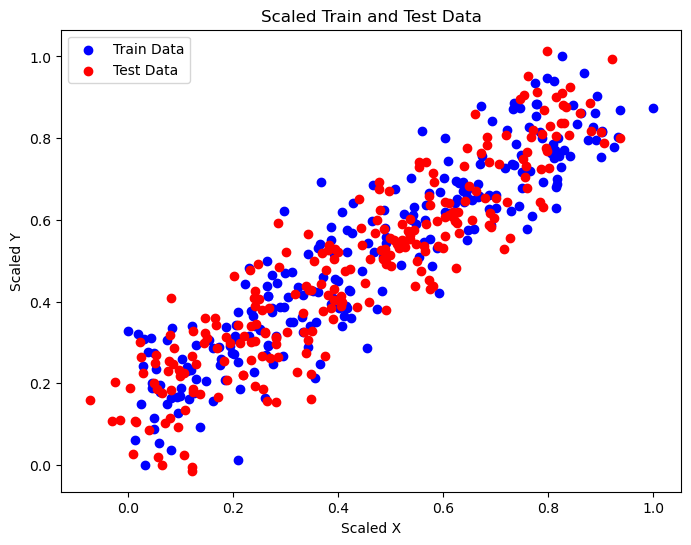

In [102]:
import numpy as np
import matplotlib.pyplot as plt

from utils import MinMaxScaler, TrainTestSplit


# Data generation process from the equation y = 0.04x^2 + 4x + 2
np.random.seed(0)
n_data = 500
tt_ratio = 0.5

x = np.arange(0, 1, 1/n_data)
y = 0.1 * x**2 + 4 * x + 2

x_noise = np.random.normal(0, 0.05, x.shape)
y_noise = np.random.normal(0, 0.5, y.shape)

x_noisy = x + x_noise
y_noisy = y + y_noise

x_train, x_test, y_train, y_test = TrainTestSplit(tt_ratio=0.5, shuffle=True)(x_noisy, y_noisy)

scaler = MinMaxScaler()

# Merge x_train and y_train for a single fit_transform operation
train_data = np.hstack((x_train.reshape(-1, 1), y_train.reshape(-1, 1)))
train_data_scaled = scaler.fit_transform(train_data)

# Split the scaled data back into x and y components
x_train_scaled = train_data_scaled[:, 0].flatten()
y_train_scaled = train_data_scaled[:, 1].flatten()

# Merge x_test and y_test for a single transform operation
test_data = np.hstack((x_test.reshape(-1, 1), y_test.reshape(-1, 1)))
test_data_scaled = scaler.transform(test_data)

# Split the scaled data back into x and y components
x_test_scaled = test_data_scaled[:, 0].flatten()
y_test_scaled = test_data_scaled[:, 1].flatten()

plt.figure(figsize=(8, 6))
plt.scatter(x_train_scaled, y_train_scaled, color='blue', label='Train Data')
plt.scatter(x_test_scaled, y_test_scaled, color='red', label='Test Data')
plt.xlabel('Scaled X')
plt.ylabel('Scaled Y')
plt.title('Scaled Train and Test Data')
plt.legend()
plt.show()


## B.1 Methods [45 pts]

Write your code in the `linear_regression.py` file under the `fit` method of the `LeastSquares`, `RidgeRegression`, `LassoRegression`, and `ElasticNetRegression` classes. 
After writing the code, you also need to fill in the `predict` function of the `LRModel` class to predict the values of the test set.
Inevitably, you also need to see the performance of your model by calculating the MSE and R2 score by filling the corresponding methods in the `metrics.py` file.

While implementing these methods, think of which methods have a closed-form solution and which ones require gradient descent-based iterations.

In [103]:
from linear_regression import LeastSquares
from metrics import mean_squared_error, r2_score


lsq = LeastSquares()
lsq.fit(x_train_scaled, y_train_scaled)
y_test_scaled_pred = lsq.predict(x_test_scaled)

# Taking the second column as the unscaled predicted values
y_test_pred_lsq = scaler.inverse_transform(y_test_scaled_pred.reshape(-1, 1))[:,1]

# Calculate the R2 and MSE
mse = mean_squared_error(y_test, y_test_pred_lsq)
r2 = r2_score(y_test, y_test_pred_lsq)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.2924410456360835
R2 Score: 0.8325966758139233


In [104]:
from linear_regression import RidgeRegression

rr = RidgeRegression()
rr.fit(x_train_scaled, y_train_scaled)
y_test_scaled_pred = rr.predict(x_test_scaled)

# Taking the second column as the unscaled predicted values
y_test_pred_rr = scaler.inverse_transform(y_test_scaled_pred.reshape(-1, 1))[:,1]

# Calculate the R2 and MSE
mse = mean_squared_error(y_test, y_test_pred_rr)
r2 = r2_score(y_test, y_test_pred_rr)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.30230901678995414
R2 Score: 0.826947909340198


In [105]:
from linear_regression import LassoRegression

lasso = LassoRegression(lr=0.002, epochs=1000, alpha=1.00)
lasso.fit(x_train_scaled, y_train_scaled)
y_test_scaled_pred = lasso.predict(x_test_scaled)

# Taking the second column as the unscaled predicted values
y_test_pred_lasso = scaler.inverse_transform(y_test_scaled_pred.reshape(-1, 1))[:,1]

# Calculate the R2 and MSE
mse = mean_squared_error(y_test, y_test_pred_lasso)
r2 = r2_score(y_test, y_test_pred_lasso)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.30719682057547454
R2 Score: 0.8241499621509255


In [106]:
from linear_regression import ElasticNetRegression


enet = ElasticNetRegression(lr=0.001, epochs=1000, alpha=0.05)
enet.fit(x_train_scaled, y_train_scaled)
y_test_scaled_pred = enet.predict(x_test_scaled)

# Taking the second column as the unscaled predicted values
y_test_pred_enet = scaler.inverse_transform(y_test_scaled_pred.reshape(-1, 1))[:,1]

# Calculate the R2 and MSE
mse = mean_squared_error(y_test, y_test_pred_enet)
r2 = r2_score(y_test, y_test_pred_lasso)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.2927951131864387
R2 Score: 0.8241499621509255


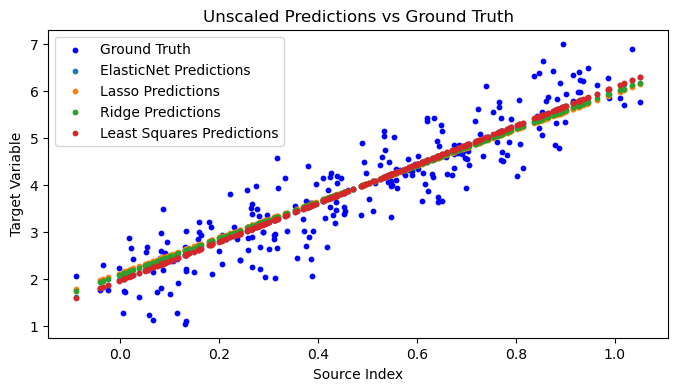

In [107]:
# Plot the unscaled predictions and the ground truth data
plt.figure(figsize=(8, 4))
plt.scatter(x_test, y_test, label='Ground Truth', s=10, color='blue')
plt.scatter(x_test, y_test_pred_enet, label='ElasticNet Predictions', s=10)
plt.scatter(x_test, y_test_pred_lasso, label='Lasso Predictions', s=10)
plt.scatter(x_test, y_test_pred_rr, label='Ridge Predictions', s=10)
plt.scatter(x_test, y_test_pred_lsq, label='Least Squares Predictions', s=10)
plt.xlabel('Source Index')
plt.ylabel('Target Variable')
plt.title('Unscaled Predictions vs Ground Truth')
plt.legend()
plt.show()

# C. Boston Housing Price Prediction [30 pts]

Now, given that you have implemented the linear regression methods, you can use them to predict the housing prices in the Boston dataset.

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

from metrics import mean_squared_error, r2_score

In [122]:
# Load the dataset
data = fetch_openml(name="boston", as_frame=True)
df = data.frame

# Display first few rows
print(df.head())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


/home/emrea/anaconda3_ubuntu/envs/lfdhw1/lib/python3.10/site-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [123]:
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

In [124]:
df = df.select_dtypes(include=['float64'])

In [125]:
X = df.drop(columns=["MEDV"]).to_numpy()   
y = df["MEDV"].to_numpy()  

#########################################################
#
# FILL IN THE CODE BELOW
#
#########################################################
# First split X and y into train and test sets and then scale the features.

splitter = TrainTestSplit(tt_ratio=0.5, shuffle=True)
X_train, X_test, y_train, y_test = splitter(X, y)


y_train = y_train.reshape(-1, 1) 
y_test  = y_test.reshape(-1, 1)

scaler = MinMaxScaler(min_limit=0, max_limit=1)

train_data        = np.hstack((X_train, y_train))       
train_data_scaled = scaler.fit_transform(train_data)
X_train_scaled    = train_data_scaled[:, :-1]           
y_train_scaled    = train_data_scaled[:,  -1]           

test_data        = np.hstack((X_test, y_test))          
test_data_scaled = scaler.transform(test_data)
X_test_scaled    = test_data_scaled[:, :-1]
y_test_scaled    = test_data_scaled[:,  -1]

In [126]:
#########################################################
#
# FILL IN THE CODE BELOW
#
#########################################################
# Train different linear regression models and store the predictions in a dictionary

models = {
    "LeastSquares": LeastSquares(),
    "RidgeRegression": RidgeRegression(lambd=1.0),
    "LassoRegression": LassoRegression(lr=0.0001, epochs=3000, alpha=0.5),
    "ElasticNetRegression": ElasticNetRegression(alpha=0.5, l1_ratio=0.5, lr=0.0001, epochs=3000)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_scaled)
    y_test_scaled_pred = model.predict(X_test_scaled)
    y_test_pred = scaler.inverse_transform(
        y_test_scaled_pred.reshape(-1, 1)
    )[:, 1]
    results[name] = y_test_pred

print("First 5 LeastSquares predictions:", results["LeastSquares"][:5])

First 5 LeastSquares predictions: [30.18807211 88.38182742 43.70447851 42.20323091 15.34449846]


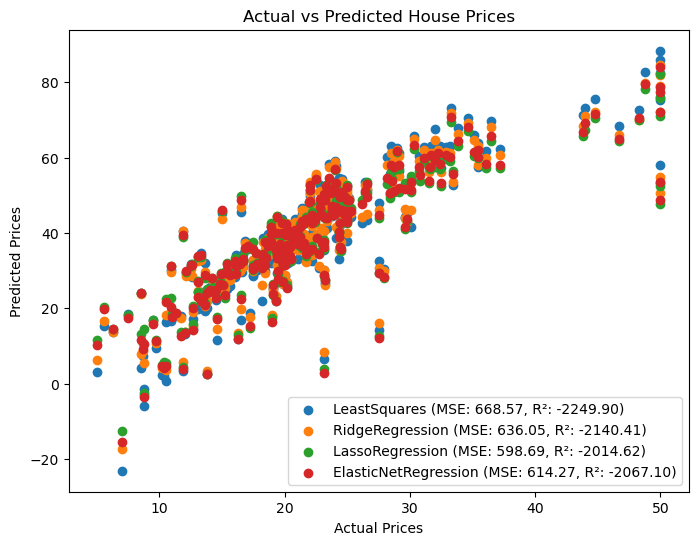

In [127]:
# Visualize predictions
plt.figure(figsize=(8, 6))
for name, y_pred in results.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    plt.scatter(x=y_test, y=y_pred, label=f"{name} (MSE: {mse:.2f}, R²: {r2:.2f})")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


After ensuring the models are working, you can implement and use the `RandomizedSearchCV` class to find the best model and the best parameters. You need to implement the `fit`, `_k_fold_split`, and `_score` methods in the `search.py` file. `_score` method may use your previously implemented metrics.

In [129]:
from search import RandomizedSearchCV


#########################################################
#
# FILL IN THE CODE BELOW
#
#########################################################
# Define the parameter distributions as a dict and list of estimators. 
# Then, initialize the RandomizedSearchCV object by defining 
# the number of iterations, scoring criterion, cross-validation folds, 
# and scaler. You then need to fit the model and find the best model.

param_distributions = {
    "LeastSquares": {},
    "RidgeRegression": {
        "lambd": [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    "LassoRegression": {
        "alpha": [0.1, 0.5, 1.0],
        "lr": [1e-4, 1e-3, 1e-2],
        "epochs": [500, 1000, 3000]
    },
    "ElasticNetRegression": {
        "alpha": [0.01, 0.1, 0.5],
        "l1_ratio": [0.3, 0.5, 0.7],
        "lr": [1e-4, 1e-3, 1e-2],
        "epochs": [500, 1000, 3000]
    }
}

estimators = {
    "LeastSquares":      LeastSquares(),
    "RidgeRegression":   RidgeRegression(),
    "LassoRegression":   LassoRegression(),
    "ElasticNetRegression": ElasticNetRegression()
}

random_search = RandomizedSearchCV(
    estimators=estimators,
    param_distributions_dict=param_distributions,
    n_iter=20,
    scoring=mean_squared_error,
    cv=2,
    random_state=42,
    scaler=scaler
)

random_search.fit(X_train_scaled, y_train_scaled)

best_model  = random_search.best_estimator_
best_score  = random_search.best_score_
best_params = random_search.best_params_

print(f"Best CV Model: {best_model.__class__.__name__}")
print(f"Best CV Score: {best_score:.2f}")
print(f"Best CV Params: {best_params}")

/mnt/c/Users/emrea/OneDrive/Desktop/lfdhw1/linear_regression.py:108: RuntimeWarning: overflow encountered in matmul
  grad = X_design.T @ error
/mnt/c/Users/emrea/OneDrive/Desktop/lfdhw1/linear_regression.py:108: RuntimeWarning: invalid value encountered in matmul
  grad = X_design.T @ error
/mnt/c/Users/emrea/OneDrive/Desktop/lfdhw1/linear_regression.py:111: RuntimeWarning: invalid value encountered in subtract
  self.w -= self.lr * (grad + subgrad)
/mnt/c/Users/emrea/OneDrive/Desktop/lfdhw1/linear_regression.py:106: RuntimeWarning: invalid value encountered in matmul
  y_pred = X_design @ self.w
/mnt/c/Users/emrea/OneDrive/Desktop/lfdhw1/linear_regression.py:143: RuntimeWarning: overflow encountered in matmul
  grad = X_design.T @ error
/mnt/c/Users/emrea/OneDrive/Desktop/lfdhw1/linear_regression.py:143: RuntimeWarning: invalid value encountered in matmul
  grad = X_design.T @ error
/mnt/c/Users/emrea/OneDrive/Desktop/lfdhw1/linear_regression.py:149: RuntimeWarning: invalid value enc

Best CV Model: LeastSquares
Best CV Score: 0.02
Best CV Params: {'estimator': 'LeastSquares'}


Test MSE: 137.20
Test R²: -460.90


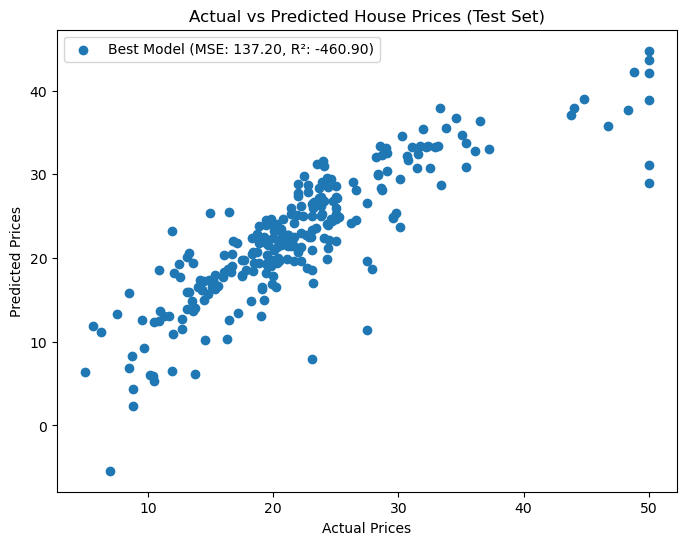

In [130]:
# Evaluate the best model on the test set
y_test_pred_scaled = best_model.predict(X_test_scaled)

# If a scaler was used, inverse transform the predictions
if scaler is not None:
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))[:, -1]
else:
    y_test_pred = y_test_pred_scaled

# Calculate performance metrics
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test:.2f}")
print(f"Test R²: {r2_test:.2f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=y_test_pred, label=f"Best Model (MSE: {mse_test:.2f}, R²: {r2_test:.2f})")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Test Set)")
plt.legend()
plt.show()
